# Create a statistical shape model based on wavelet transform and PCA.
The original paper is [here](https://ieeexplore.ieee.org/document/1199642)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywt import WaveletPacket

## Load the data in the shape space.
TODO: 
* create a transformation between shape space and image space.

N=12, K=18


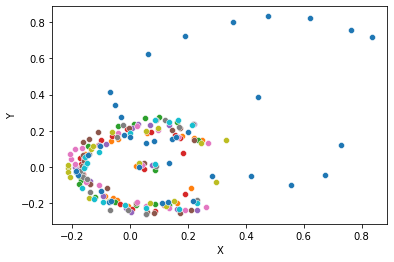

In [3]:
df = pd.read_csv('Landmarks_Aligned.csv', index_col=(0,1))
N = df.index.get_level_values('Shape').max()
K = df.index.get_level_values('Landmark').max()

fig, ax = plt.subplots()
for i in range(1,N):
    sns.scatterplot(data=df.loc[df.index.get_level_values('Shape')==i], x='X', y='Y', ax=ax)

print(f'{N=}, {K=}')

## Initiate the algorithm
Each of the $N$ elements of the list is a shape, defined by $K$ landmark points.
$U_n$ is the list of $x$ coordinates of the landmarks, $V_n$ is the list of $y$ coordinates of the landmarks. 

In [4]:
# Separate the data into x and y coordinates
Un, Vn = np.zeros((K,N)), np.zeros((K,N))
for iShape in range(1,N+1):
    un = df.loc[df.index.get_level_values('Shape')==iShape].X.to_numpy()
    vn = df.loc[df.index.get_level_values('Shape')==iShape].Y.to_numpy()
    Un[:,iShape-1] = un
    Vn[:,iShape-1] = vn

print(f'{Un.shape=}, {Vn.shape=}')

Un.shape=(18, 12), Vn.shape=(18, 12)


Choose a wavelet packet and decompose the signal in $B=2^P$ bands. Each columns of $U_n$ and $V_n$ corresponds to a shape, hence $axis=0$.

In [50]:
P = 3 # The level of decomposition
UnWP = WaveletPacket(data=Un, wavelet='db1', mode='symmetric', axis=0, maxlevel=P)
VnWP = WaveletPacket(data=Vn, wavelet='db1', mode='symmetric', axis=0, maxlevel=P)

In [51]:
for i in range(1,1+P):
    nodes = [node.path for node in UnWP.get_level(i, 'freq')]
    print(f'For level {i}, the nodes path are {nodes}')

For level 1, the nodes path are ['a', 'd']
For level 2, the nodes path are ['aa', 'ad', 'dd', 'da']
For level 3, the nodes path are ['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']


In [52]:
node = ''
for i in range(1,1+P):
    nodeA = node + 'a'
    nodeD = node + 'd'
    print(f'Level {i}: {nodeA}, {nodeD}.')
    node = nodeA
print(UnWP['d'].data[:,2])

Level 1: a, d.
Level 2: aa, ad.
Level 3: aaa, aad.
[ 0.0036875  -0.04097021 -0.05018221 -0.03558316  0.24060938 -0.07445845
 -0.02681974 -0.04318921  0.10536621]


In [58]:
def format_array(a):

    """Consistent array representation across different systems"""

    import numpy

    a = numpy.where(numpy.abs(a) < 1e-5, 0, a)

    return numpy.array2string(a, precision=8, separator=' ', suppress_small=True)

del UnWP['da']
del UnWP['ad']

for n in UnWP.get_leaf_nodes(False):
    print(n.path, format_array(n.data[:,0]))

aa [0.05116074 0.96677115 0.4554387  1.10671812 1.27840592]
dd [ 0.02928303 -0.00820255  0.46264306  0.00996753  0.        ]
